<a href="https://colab.research.google.com/github/RanjithAi/Leetcode_Solutions/blob/main/CALORIES_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import io

In [5]:
from google.colab import files
uploaded = files.upload()


Saving fastfood2.csv to fastfood2.csv


In [8]:
df = pd.read_csv(io.BytesIO(uploaded['fastfood2.csv']), encoding='latin1')

In [11]:
df.dropna(subset=['Carbs (g)', 'Fats (g)', 'Sugar (g)', 'Protein (g)', 'Actual Calories'], inplace=True)


In [12]:
df.rename(columns={'Item': 'Item Name'}, inplace=True)


In [14]:
X = df[['Sugar (g)', 'Carbs (g)', 'Fats (g)', 'Protein (g)']]
y = df['Actual Calories']


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
def predict_by_item_name(food_name, tolerance=10):
    match = df[df['Item Name'].str.lower() == food_name.lower()]
    if match.empty:
        print(f"'{food_name}' not found.")
        return
    row = match.iloc[0]
    features = pd.DataFrame([[row['Sugar (g)'], row['Carbs (g)'], row['Fats (g)'], row['Protein (g)']]],
                            columns=X.columns)
    predicted = model.predict(features)[0]
    actual = row['Actual Calories']
    print(f"{food_name.title()}: Predicted = {predicted:.2f} kcal | Actual = {actual} kcal")
    if abs(predicted - actual) <= tolerance:
        print("Prediction is within range.")
    else:
        print("Prediction is out of range.")
    plt.figure(figsize=(6, 4))
    sns.barplot(x=['Predicted', 'Actual'], y=[predicted, actual], palette='pastel')
    plt.ylabel("Calories")
    plt.title(food_name.title())
    plt.tight_layout()
    plt.show()

Big Mac: Predicted = 531.50 kcal | Actual = 540 kcal
Prediction is within range.


<ipython-input-16-7f8f8c756a1f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Predicted', 'Actual'], y=[predicted, actual], palette='pastel')


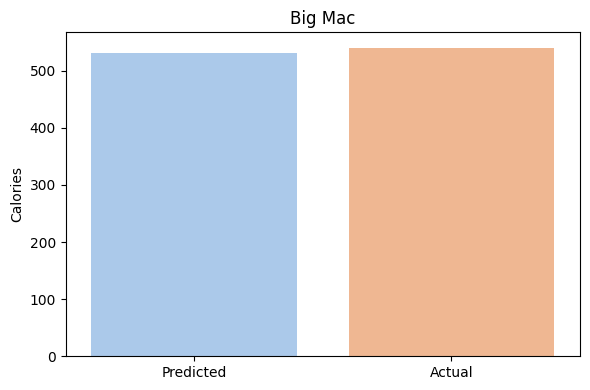

In [17]:
predict_by_item_name("Big Mac")

In [18]:
predict_by_item_name("Popcorn")

'Popcorn' not found.
